In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
df = pd.read_csv('..\data\heart_disease_pcs.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.578814,0.664854,-0.536787,-1.495392,-0.499485,0
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,0.745347,-0.259063,1.069777,0.342524,1.431509,1
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,1.130179,-0.324995,0.209299,0.043205,0.462304,1
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.388361,-0.522221,-2.153525,0.760079,0.228379,0
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.625587,0.379567,0.014736,1.050381,0.628110,0


In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [32]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort and display
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)


PC1     0.440602
PC4     0.079953
PC7     0.074358
PC2     0.072654
PC8     0.058755
PC6     0.058544
PC3     0.058356
PC9     0.057889
PC10    0.052242
PC5     0.046647
dtype: float64


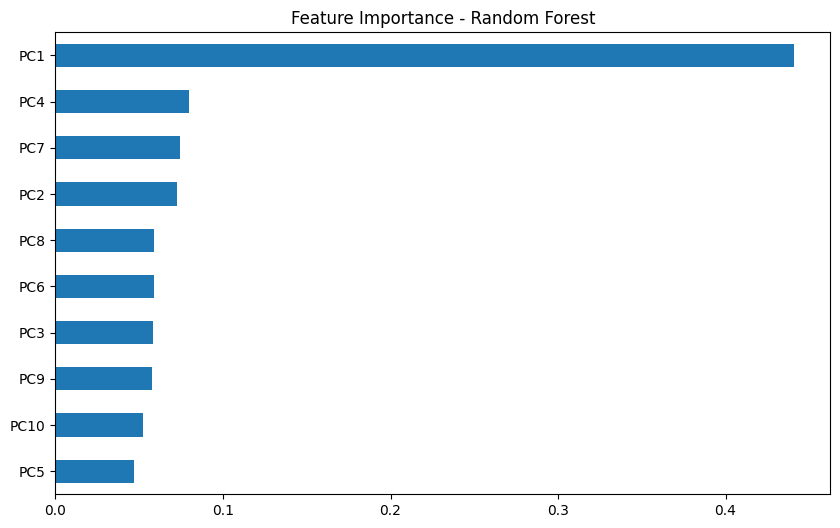

In [33]:
feat_imp.plot(kind='barh', figsize=(10,6), title='Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [34]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC7', 'PC9', 'PC10'], dtype='object')


In [ ]:

# Make sure all features are positive
X_chi2 = X.copy()
X_chi2 = X_chi2.apply(lambda x: x - x.min() if x.min() < 0 else x)

chi2_selector = SelectKBest(score_func=chi2, k=8)
chi2_selector.fit(X_chi2, y)

chi2_selected = X.columns[chi2_selector.get_support()]
print("Chi2 selected features:", chi2_selected)


Chi2 selected features: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC7', 'PC9', 'PC10'], dtype='object')


In [37]:
selected_features = X.columns[rfe.support_]
X_selected = X[selected_features]
X_selected.to_csv("../data/X_selected_rfe.csv", index=False)